# 1. Import relevant libraries

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Import csv file

In [308]:
df = pd.read_csv('new_year_sale.csv')

# 3. Find out no. of rows and no. of columns in the dataframe

In [309]:
print("Number of rows and columns in the dataset:",df.shape)

Number of rows and columns in the dataset: (11251, 15)


# 4. See first few rows of the dataframe in the notebook itself

In [310]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# 5. Determine the datatype of columns

In [311]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

# 6. Drop columns which are not related, in your opinion

In [312]:
# I have dropped the column values 'Age Group', 'Status', 'unnamed1' as they are not required for the analysis. (the drop was done without inplace=True, So my original dataset is intact)
new_df = df.drop(['Age Group', 'Status', 'unnamed1'], axis=1)

# 7. Check for null values

In [313]:
print(new_df.isnull().sum())
new_df.isnull()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64


,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False


# 8. Drop null values from the dataframe

In [314]:
# Amount, Status and unnamed1 are the columns with null values.(the drop was done without inplace=True, So my original dataset is intact)
new_df.dropna(axis = 1, how = 'any')

,User_ID,Cust_name,Product_ID,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2
...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3


# 9. Change the data type of columns, wherever required

In [315]:
# Replacing the values of NaN with 0 and converting the datatype of Amount column to int64
new_df['Amount'] = new_df['Amount'].fillna(0).astype('int64')


# 10. Verify the changed data type of columns

In [316]:
# Amount column is converted to int64 datatype from float64
new_df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

# 11. Print columns name in a list

In [317]:
list(new_df.columns)

['User_ID',
 'Cust_name',
 'Product_ID',
 'Gender',
 'Age',
 'Marital_Status',
 'State',
 'Zone',
 'Occupation',
 'Product_Category',
 'Orders',
 'Amount']

# 12. Change column name 'Marital_Status' to 'Whether_married' and 'Cust_name' to 'Customer_name' permanently

In [318]:
new_df.rename(columns={'Marital_Status':'Whether_married', 'Cust_name':'Customer_name'}, inplace=True)
new_df

,User_ID,Customer_name,Product_ID,Gender,Age,Whether_married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,37,0,Karnataka,Southern,Agriculture,Office,3,206


# 13. Return the description of all the columns (count, mean, std etc.)

In [319]:
new_df.describe()

,User_ID,Age,Whether_married,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11251.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9443.527598
std,1.716125e+03,12.754122,0.493632,1.115047,5228.683337
min,1.000001e+06,12.000000,0.000000,1.000000,0.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5440.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8108.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12671.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# 14. Return the description of these specific columns only: Age, Orders, Amount

In [320]:
new_df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11251.000000
mean,35.421207,2.489290,9443.527598
std,12.754122,1.115047,5228.683337
min,12.000000,1.000000,0.000000
25%,27.000000,1.500000,5440.000000
50%,33.000000,2.000000,8108.000000
75%,43.000000,3.000000,12671.000000
max,92.000000,4.000000,23952.000000


# 15. Determine how much sum of amount males and females spent separately. Sort that amount in descending order

In [321]:
new_df.groupby('Gender')['Amount'].sum().sort_values(ascending=False)

Gender
F    74335853
M    31913276
Name: Amount, dtype: int64

# 16. Draw a histogram of column Age, Resize the figure

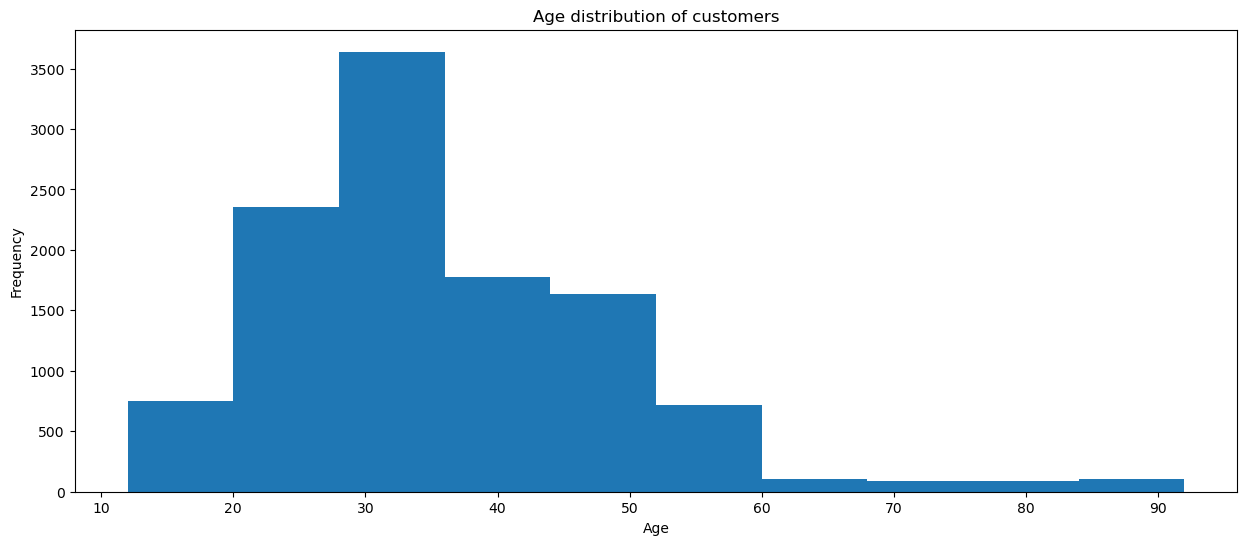

In [322]:
plot = new_df['Age'].plot(kind='hist', figsize = (15, 6), title='Age distribution of customers')
plot.set_xlabel('Age')
plt.show()

# 17. compare on barchat how many married males are there in states: Delhi, Gujarat, Rajasthan, Telangana

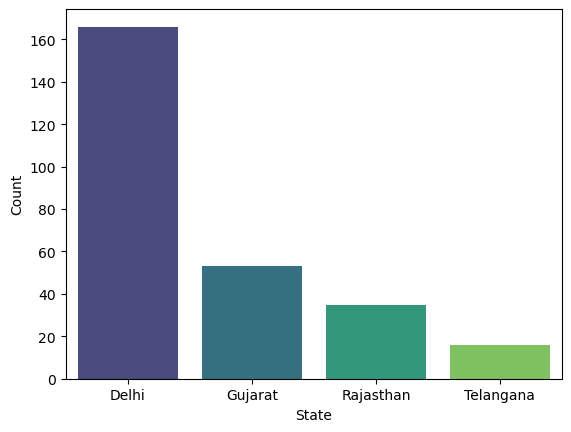

In [323]:
# Filter the dataframe to get only married males
married_males_count = new_df[(new_df['Whether_married'] == 1) & (new_df['Gender'] == 'M')]

# Define a list of states to filter by
states = ['Delhi', 'Gujarat', 'Rajasthan', 'Telangana']

# Group the married males by state and count the number of occurrences
married_males_count_by_state = married_males_count.groupby('State').apply(lambda x: x['Whether_married'].count())

# Filter the results to only include the states in the list
married_males_count_by_state = married_males_count_by_state[states]

# Create a bar plot of the results
plot = sns.barplot(x=married_males_count_by_state.index, y=married_males_count_by_state.values, palette="viridis")
plot.set(xlabel='State', ylabel='Count')
plt.show()


# 17. With condition same as in previous question, Draw a scatter plot with Amount on y-axis and Age on x-axis 

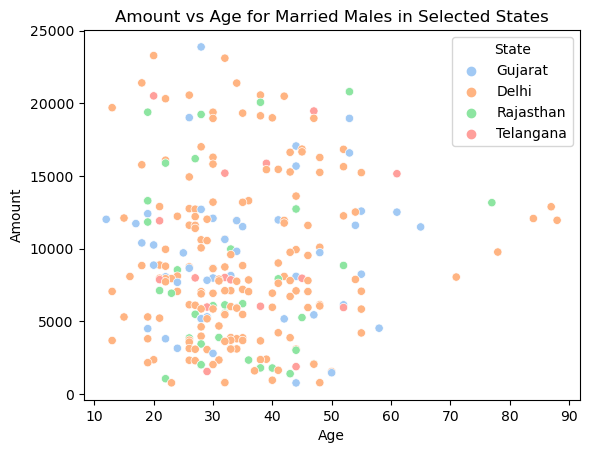

In [324]:
# Filter the dataframe to get only married males
married_males_count = new_df[(new_df['Whether_married'] == 1) & (new_df['Gender'] == 'M')]

# Define a list of states to filter by
states = ['Delhi', 'Gujarat', 'Rajasthan', 'Telangana']

# Filter the married males by state
married_males_count_by_state = married_males_count[married_males_count['State'].isin(states)]

# Create a scatter plot of Amount against Age using seaborn
sns.scatterplot(data=married_males_count_by_state, x='Age', y='Amount', hue='State', palette='pastel')
plt.title('Amount vs Age for Married Males in Selected States')
plt.show()


# 18. Get creative and surprise us. (Mandatory)

(Besides questions above, Put into practice knowledge you have acquired as a part of our course so far)

In [326]:
# To find out which occupation has spent the most amount of money.
Ocuupation = new_df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False)
Ocuupation

Occupation
IT Sector          14755079
Healthcare         13034586
Aviation           12602298
Banking            10770610
Govt                8517212
Hospitality         6376405
Media               6295832
Automobile          5368596
Chemical            5297436
Lawyer              4981665
Retail              4783170
Food Processing     4070670
Construction        3597511
Textile             3204972
Agriculture         2593087
Name: Amount, dtype: int64

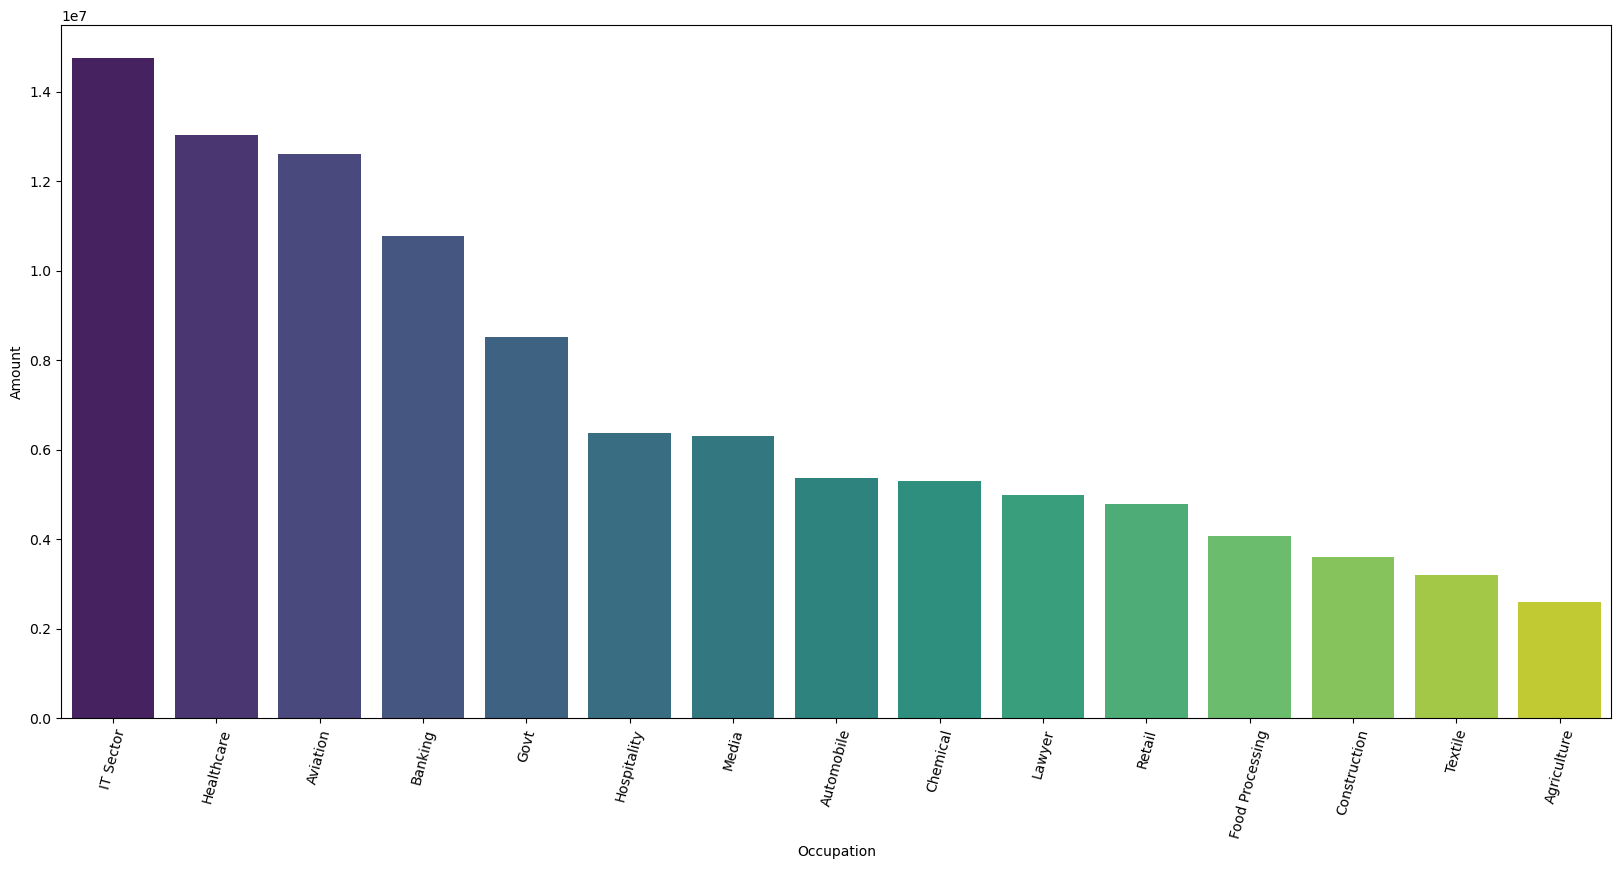

In [348]:
plt.figure(figsize=(20,9))
plot = sns.barplot(x=Ocuupation.index, y=Ocuupation.values, palette="viridis")
plot.set_xlabel('Occupation')
plot.set_ylabel('Amount')
plt.xticks(rotation=75)
plt.show()

### Best of Luck

Thank you!